<a href="https://colab.research.google.com/github/myowon/-AI/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST**
Keras를 사용

In [ ]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

MNIST 데이터셋은 28X28 픽셀 크기의 이미지로 구성

El conjunto de datos MNIST consiste en imágenes de tamaño de 28X28 píxeles

In [ ]:
# 28x28
img_rows = 28
img_cols = 28

#mnist.load_data()를 사용하여 MNIST 데이터셋을 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#입력 데이터의 모양(shape)을 설정, 1은 이미지 색상 채널(흑백)
input_shape = (img_rows, img_cols, 1)

11490434/11490434 [==============================] - 0s 0us/step


0


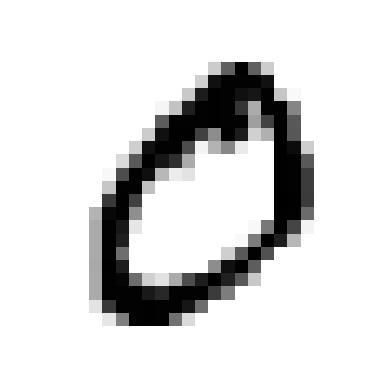

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap = 'binary')
plt.axis('off')
plt.show

print(y_train[1])

In [ ]:
#4차원 배열로 변환 -> CNN모델을 사용하기 위한 데이터의 형태 맞춤
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

#이미지 데이터를 0에서 1 사이의 값으로 정규화(x_train과 x_test의 픽셀 값은 0부터 255까지의 값으로 이뤄짐)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.




---


전처리된 MNIST 데이터셋인 x_train, x_test의 형태와 샘플 개수를 출력


Imprime la forma y la cuenta de muestras de los conjuntos de datos MNIST pre procesados, x_train, x_test

---





In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# one-hot encoding

In [ ]:
batch_size = 128 #학습 과정에서 사용되는 미니배치의 크기
num_classes = 10 #분류할 클래스의 개수(숫자 0~9)
epochs = 3  #전체 데이터셋에 대해 학습을 진행할 에포크(epoch) 횟수

#'to_categorical 함수를 사용하여 원-핫 인코딩을 수행
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)





> epochs


epochs의 수만큼 학습이 진행된다. -> 여러번 학습할 수록 성능이 좋아진다.그러나  에포크 수가 너무 많으면 과적합이 발생한다.


---

El aprendizaje avanza tanto como el número de épocas. -> Cuanto más aprendas, mejor es la actuación. Sin embargo, demasiadas épocas resultan en un exceso de equipamiento.




> to_categorical

num_classes : 3

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

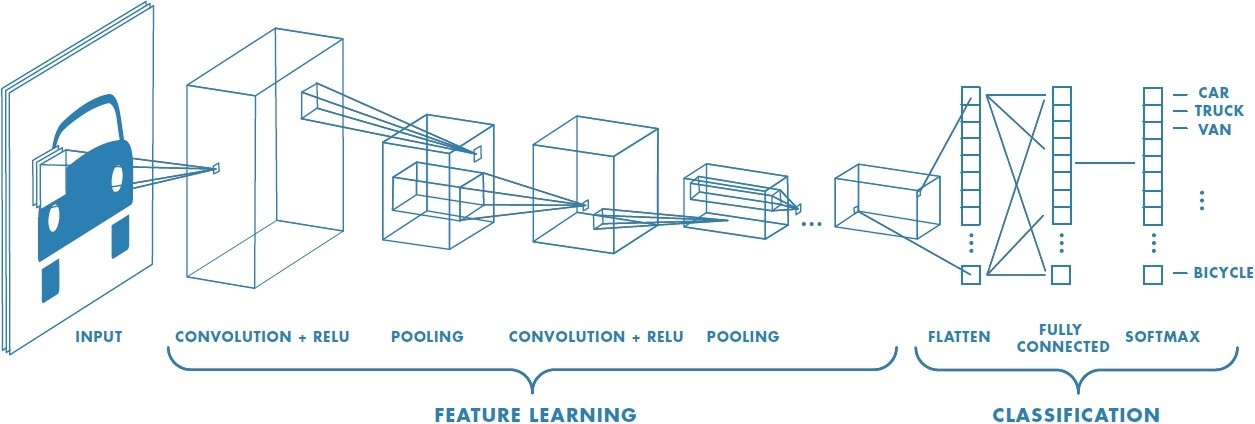

In [ ]:
model = Sequential()

#첫번째 Conv2D + MaxPooling2D
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#두번째 Conv2D + MaxPooling2D
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25)) #과적합 방지
model.add(Flatten()) #다차원 배열을 1차원 배열로 변환
model.add(Dense(1000, activation='relu')) #1000개의 뉴런을 가진 fully connected 레이어 추가
model.add(Dropout(0.5)) #과적합 방지
model.add(Dense(num_classes, activation='softmax')) #다중 클래스 분류(각 입력 이미지에 대해 각 클래스에 속할 확률을 계산)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

# Model training and validation

In [ ]:
#모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#모델을 x_train, y_train 데이터로 학습
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
#모델 평가(테스트 데이터 사용)
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/3
469/469 [==============================] - 117s 246ms/step - loss: 0.1762 - accuracy: 0.9457 - val_loss: 0.0434 - val_accuracy: 0.9859
Epoch 2/3
469/469 [==============================] - 114s 243ms/step - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0314 - val_accuracy: 0.9902
Epoch 3/3
469/469 [==============================] - 119s 253ms/step - loss: 0.0437 - accuracy: 0.9855 - val_loss: 0.0282 - val_accuracy: 0.9897
Test loss: 0.028228048235177994
Test accuracy: 0.9897000193595886


In [ ]:
import random
import matplotlib.pyplot as plt

predicted_result = model.predict(x_test) #x_test 데이터 예측
predicted_labels = np.argmax(predicted_result, axis=1) #예측된 결과의 확률 값 중에서 가장 높은 값을 갖는 클래스의 인덱스 추출

test_labels = np.argmax(y_test, axis=1) #실제 정답 레이블(y_test에서 가장 높은 값을 갖는 클래스의 인덱스를 추출)

313/313 [==============================] - 6s 18ms/step


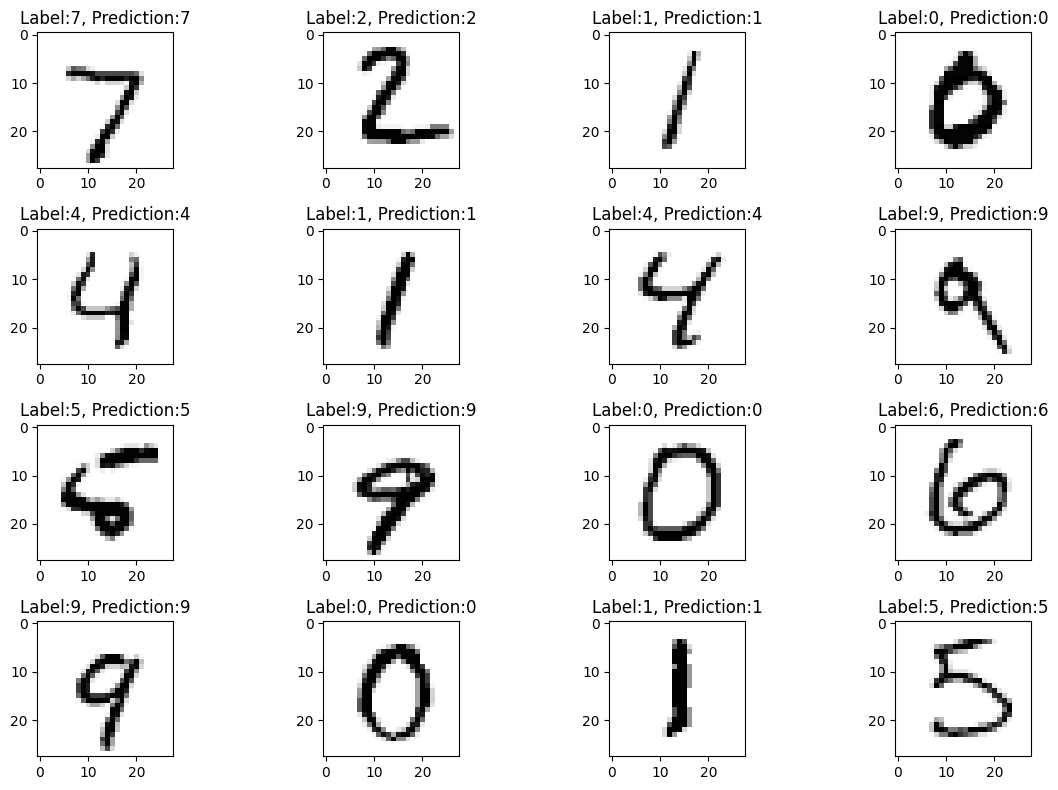

In [ ]:
count = 0

plt.figure(figsize=(12,8)) #캔버스 크기 설정

for n in range(16):
    count += 1
    plt.subplot(4, 4, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest') #x_test에 있는 이미지 출력
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n]) #실제 레이블과 예측 레이블
    plt.title(tmp)

plt.tight_layout()
plt.show()